In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

print("\nIris Dataset")
print("-" * 98)
df_string = iris_df.head(100).to_string()
formatted_df = '\n'.join('| ' + line + ' |' for line in df_string.split('\n'))
print(formatted_df)
print("-" * 98)
print("\nDataset Shape:", iris_df.shape)


Iris Dataset
--------------------------------------------------------------------------------------------------
|     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target target_names |
| 0                 5.1               3.5                1.4               0.2       0       setosa |
| 1                 4.9               3.0                1.4               0.2       0       setosa |
| 2                 4.7               3.2                1.3               0.2       0       setosa |
| 3                 4.6               3.1                1.5               0.2       0       setosa |
| 4                 5.0               3.6                1.4               0.2       0       setosa |
| 5                 5.4               3.9                1.7               0.4       0       setosa |
| 6                 4.6               3.4                1.4               0.3       0       setosa |
| 7                 5.0               3.4                1.5           

In [9]:
# Extraemos la columna 0 y 2 (longitud y ancho del sépalo)
x = iris.data[:100, [0, 2]]

# Cargamos solo las 100 primeras muestras (50 de cada clase)
y = iris.target[:100]

# Convertimos las etiquetas(target) a -1 y 1
y = np.where(y == 0, -1, 1) 

w = np.random.randn(2)
theta = 1
learning_rate = 0.1
num_epocas = 50

In [10]:
def activacion(z):
    if z >= 0:
        return 1
    else:
        return - 1

In [11]:
for epoca in range(num_epocas):
    error_total = 0
    print("\nEpoca:", epoca + 1)
    for i in range(len(x)):
        xi = x[i]
        obj = y[i]
        z = np.dot(w, xi)
        y_pred = activacion(z) + theta
        error = obj - y_pred
        error_total += abs(error)
        
        print(
            f"Iteracion: {i}",
            f"Valor x: {xi}",
            f"Salida real: {obj}",
            f"Salida predicha: {y_pred}",
            f"Error: {error}",
        )
        
        if error != 0:
            w += learning_rate * error * xi
            theta += learning_rate * error
            
    if error_total == 0:
        print("\nEntrenamiento completado en la época:", epoca + 1)
        break




Epoca: 1
Iteracion: 0 Valor x: [5.1 1.4] Salida real: -1 Salida predicha: 2 Error: -3
Iteracion: 1 Valor x: [4.9 1.4] Salida real: -1 Salida predicha: -0.30000000000000004 Error: -0.7
Iteracion: 2 Valor x: [4.7 1.3] Salida real: -1 Salida predicha: -0.37 Error: -0.63
Iteracion: 3 Valor x: [4.6 1.5] Salida real: -1 Salida predicha: -0.43300000000000005 Error: -0.567
Iteracion: 4 Valor x: [5.  1.4] Salida real: -1 Salida predicha: -0.4897 Error: -0.5103
Iteracion: 5 Valor x: [5.4 1.7] Salida real: -1 Salida predicha: -0.54073 Error: -0.45926999999999996
Iteracion: 6 Valor x: [4.6 1.4] Salida real: -1 Salida predicha: -0.586657 Error: -0.413343
Iteracion: 7 Valor x: [5.  1.5] Salida real: -1 Salida predicha: -0.6279913 Error: -0.37200869999999997
Iteracion: 8 Valor x: [4.4 1.4] Salida real: -1 Salida predicha: -0.6651921700000001 Error: -0.3348078299999999
Iteracion: 9 Valor x: [4.9 1.5] Salida real: -1 Salida predicha: -0.698672953 Error: -0.301327047
Iteracion: 10 Valor x: [5.4 1.5] Sa

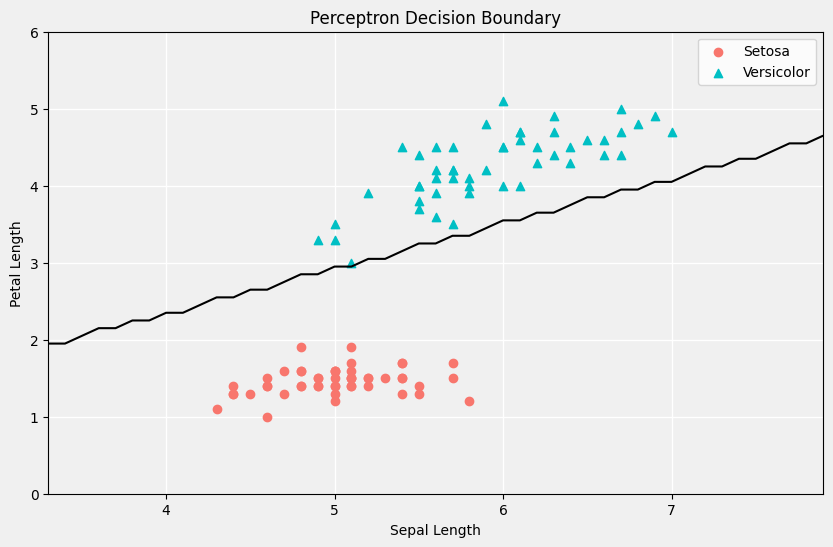

In [12]:
# Puntos de datos de entrenamiento
plt.figure(figsize=(10, 6), facecolor='#f0f0f0')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color='#f8766d', label='Setosa')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='#00bfc4', label='Versicolor', marker='^')


x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([activacion(np.dot(w, [x1, x2])) + theta 
              for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='k')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Perceptron Decision Boundary')
plt.legend()

plt.grid(True, color='white', linestyle='-', linewidth=1)
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor('#f0f0f0')

plt.show()